# Dimension Reduction Techniques 
+ Instead of using the original predictors, we transform them first and then fit our models. 
+ Usually transform variables so that there are less in number than the original set.
+ Then fit a least squares model using the transformed variables.
+ Let $Z_1, Z_2, \ldots, Z_M$ represent $M<p$ linear combinations of original $p$ predictors.
$$Z_m = \sum_{j=1}^p{\phi_{jm}X_j}$$
for some constants $\phi_{1m}, \phi_{2m}, \ldots, \phi_{pm},\; m=1, \ldots, M$.
+ We can then fit the linear regression model
$$y_i = \theta_0 + \sum_{m=1}^M{\theta_m z_{im}} + \epsilon_i, \quad i=1, \ldots, n$$
using least squares.
+ Notice that
$$ \sum_{m=1}^M{\theta_m z_{im}} = \sum_{m=1}^M{\theta_m}\sum_{j=1}^p{\phi_{jm}x_{ij}} = \sum_{j=1}^p{\sum_{m=1}^M{\theta_m\phi_{jm}x_{ij}}} = \sum_{j=1}^p{\beta_jx_{ij}} $$
where
$$\beta_j = \sum_{m=1}^M{\theta_m\phi_{jm}}$$


## Principal Component Analysis (PCA) 
+ Here we describe its use as a dimension reduction technique for regression.

+ The first principal component is the direction where observations vary the most (Fig. 6.14). 
+ We want to capture as much information as we can in one single direction.
+ Which single direction captures as much information as possible? 
+ The direction where the variance is highest amongst the projected points.


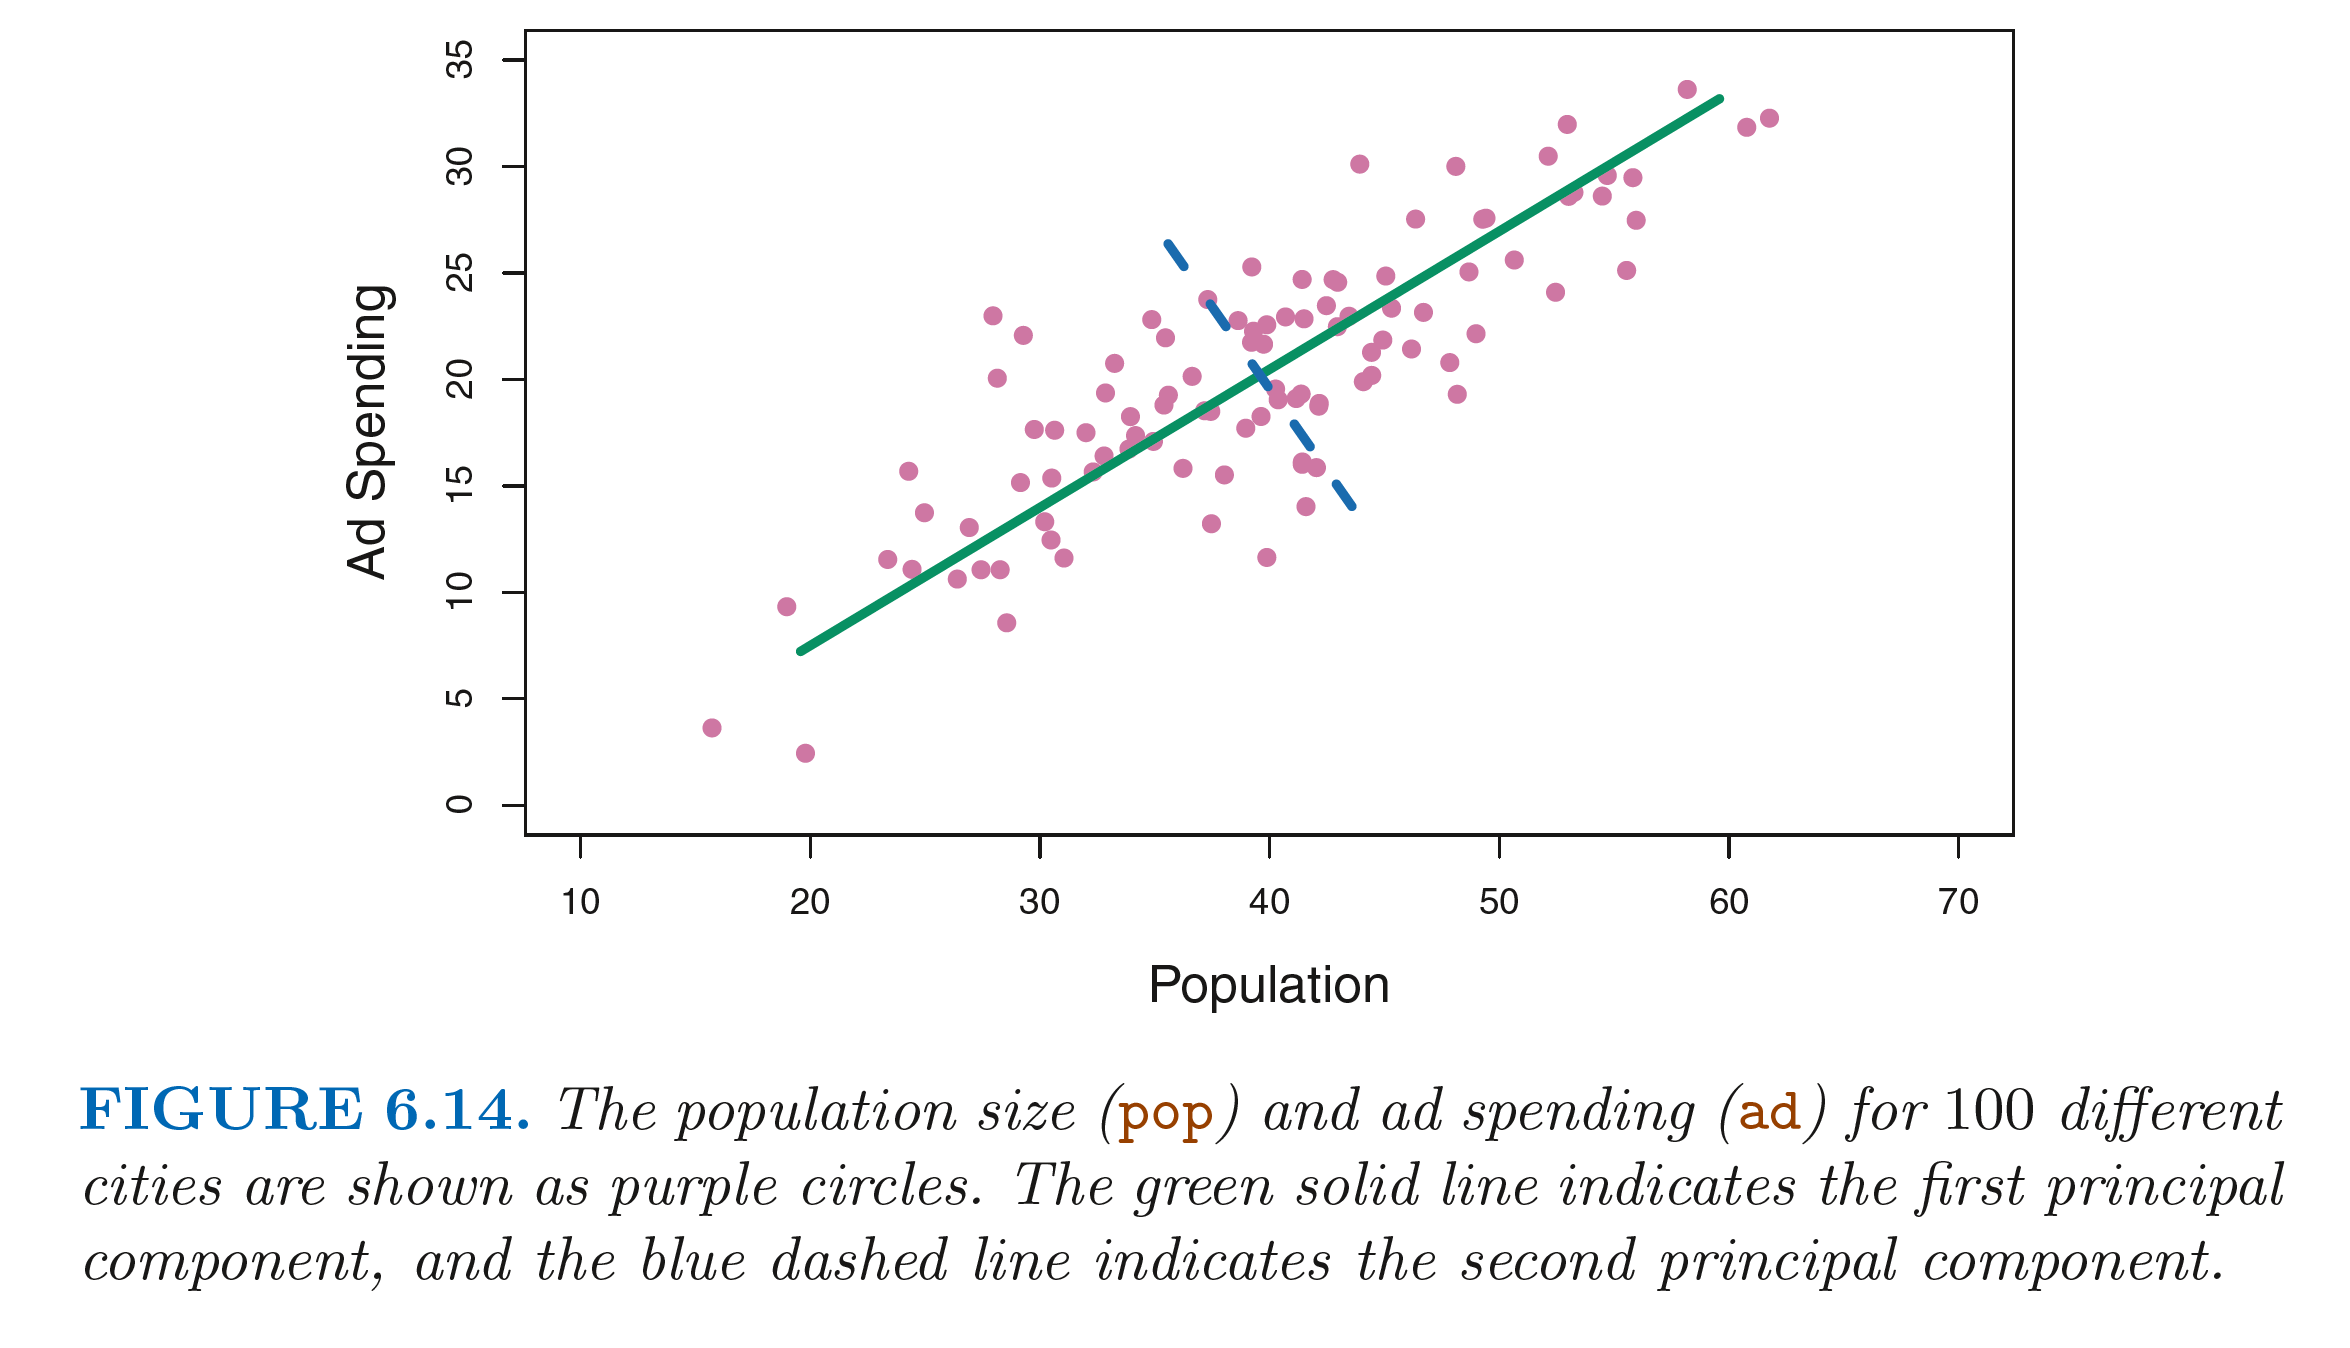

In [1]:
from IPython.display import Image
Image('D:/ukm.ppt/机器学习/week4/images/pw48.png', width =700)

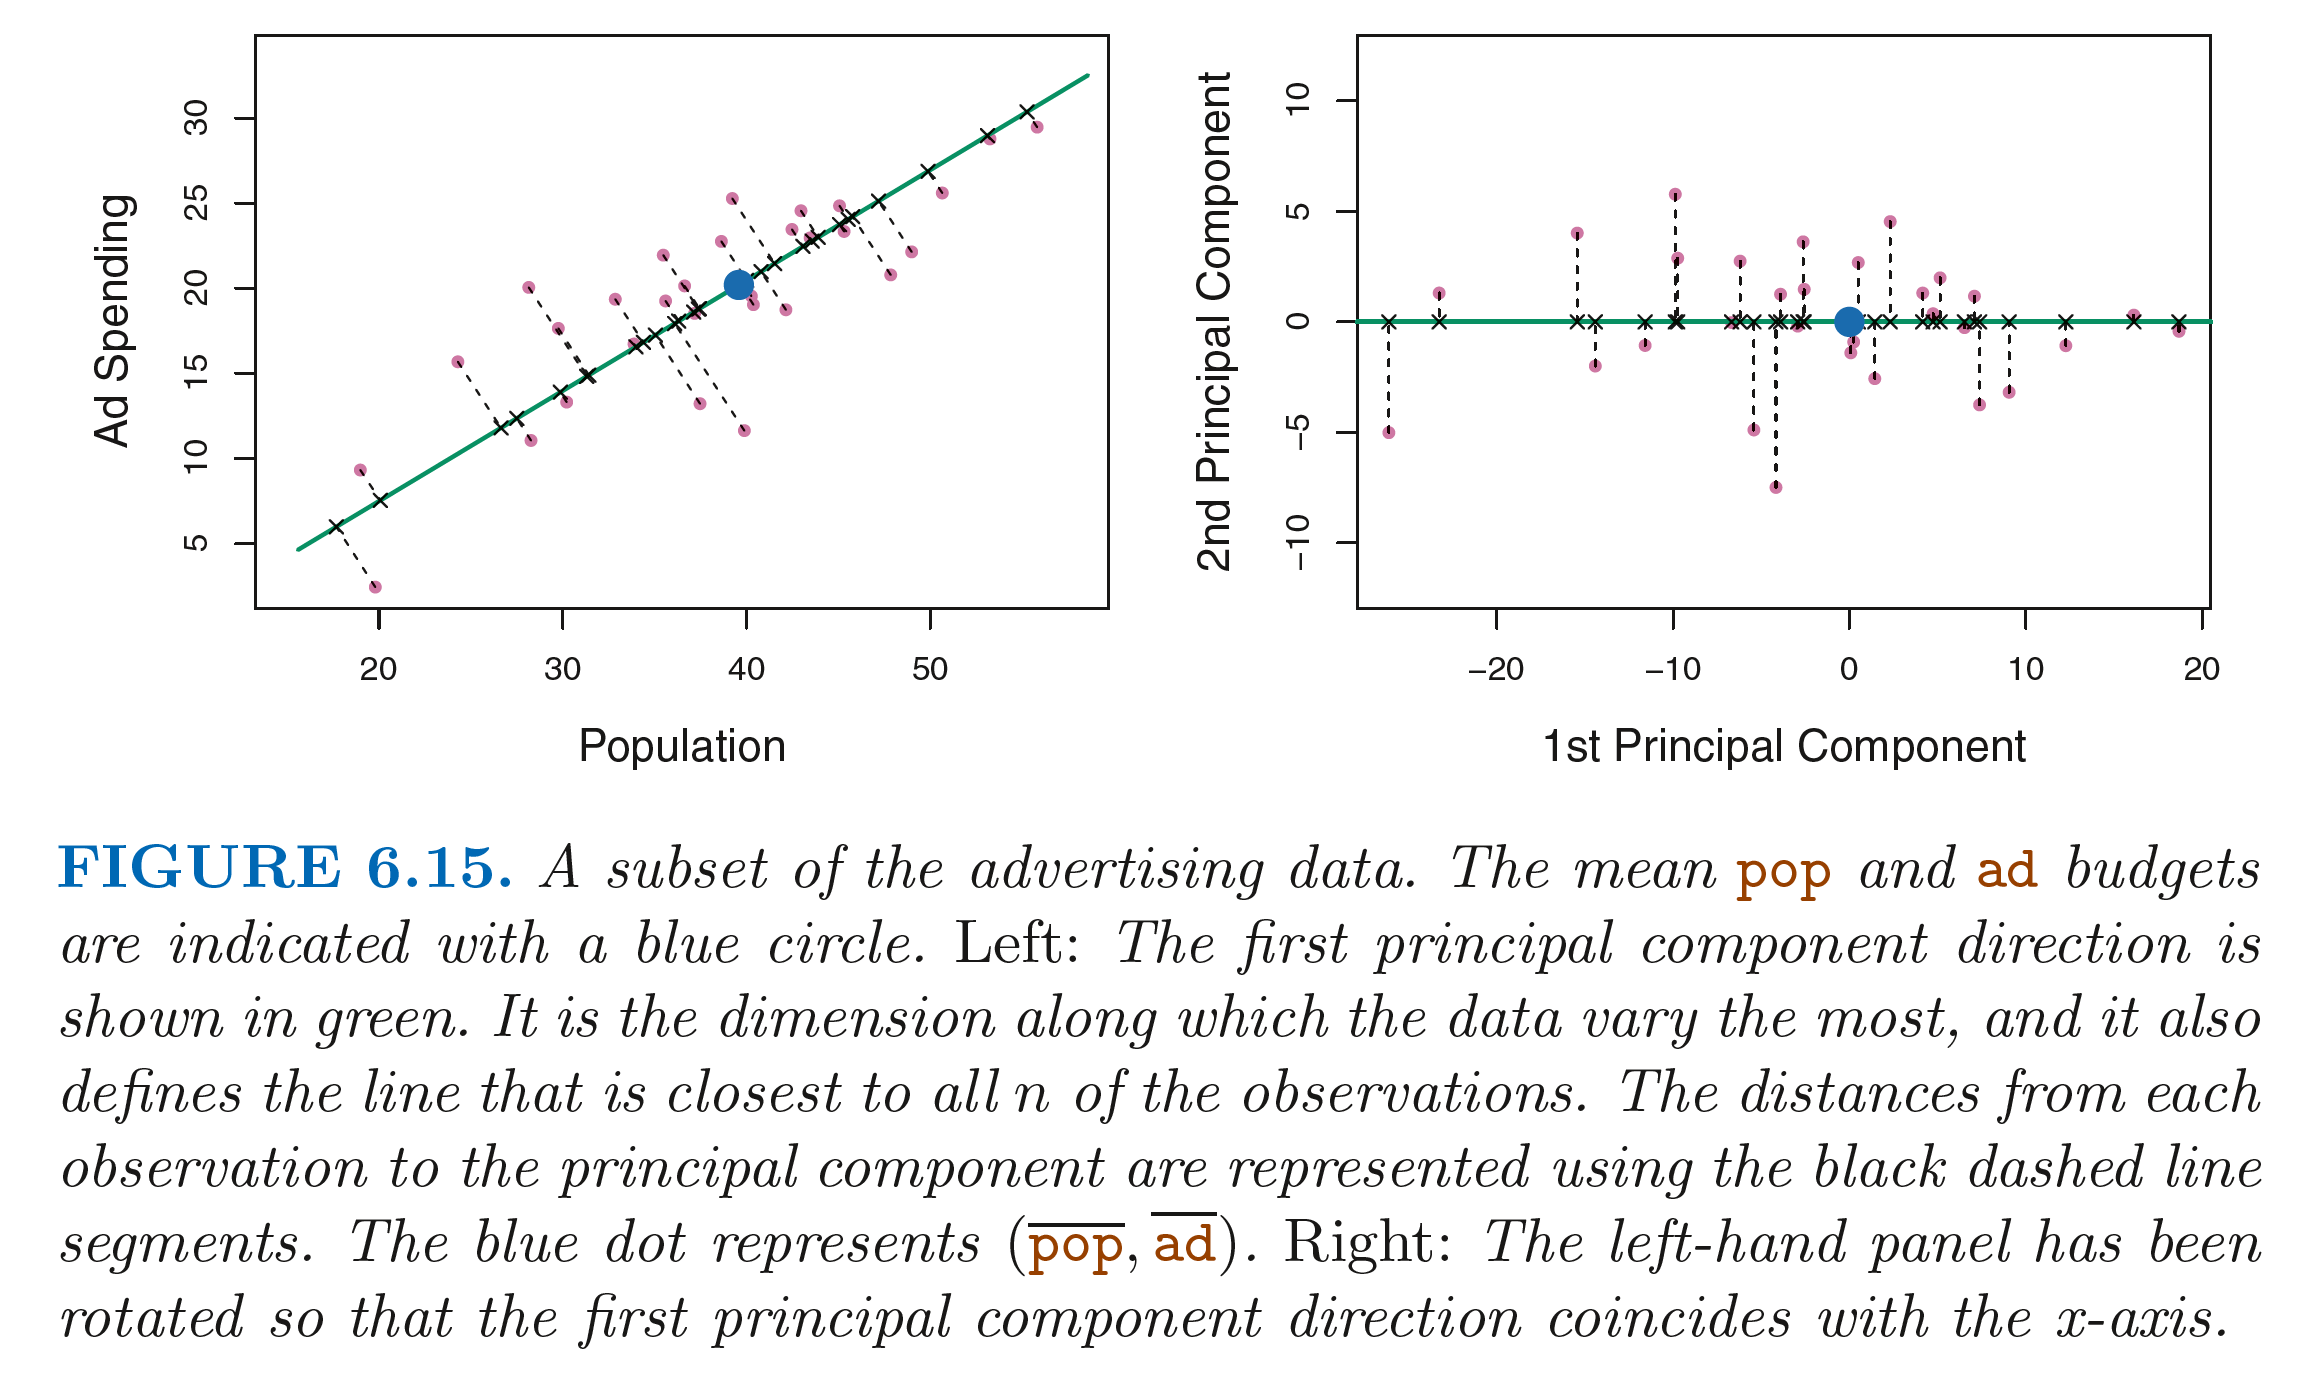

In [2]:
Image('D:/ukm.ppt/机器学习/week4/images/pw49.png', width =700)

+ The first principal component is
$$Z_1 = 0.839 \times (\tt{pop} - \overline{\tt{pop}}) + 0.544 \times (\tt{ad} - \overline{\tt{ad}}) $$
+ $\phi_{11} = 0.839$ and $\phi_{21} = 0.544$
+ $\phi_{11}^2 + \phi_{21}^2 = 1$
+ Since $n = 100$, $\tt{pop}$ and $\tt{ad}$ are vectors of length 100, and so is $Z_1$
$$z_{i1} = 0.839 \times (\tt{pop}_i - \overline{\tt{pop}}) + 0.544 \times (\tt{ad}_i - \overline{\tt{ad}}) $$
+ $z_i1$ are the **principal component scores** (Right Fig 6.15).
+ Each transformed first principal component can be thought as single number summaries of all that particular observation.
+ For this example, if $z_{i1}<0$, this indicates a city with below-average population size and below average ad spending. A positive score suggests the opposite.

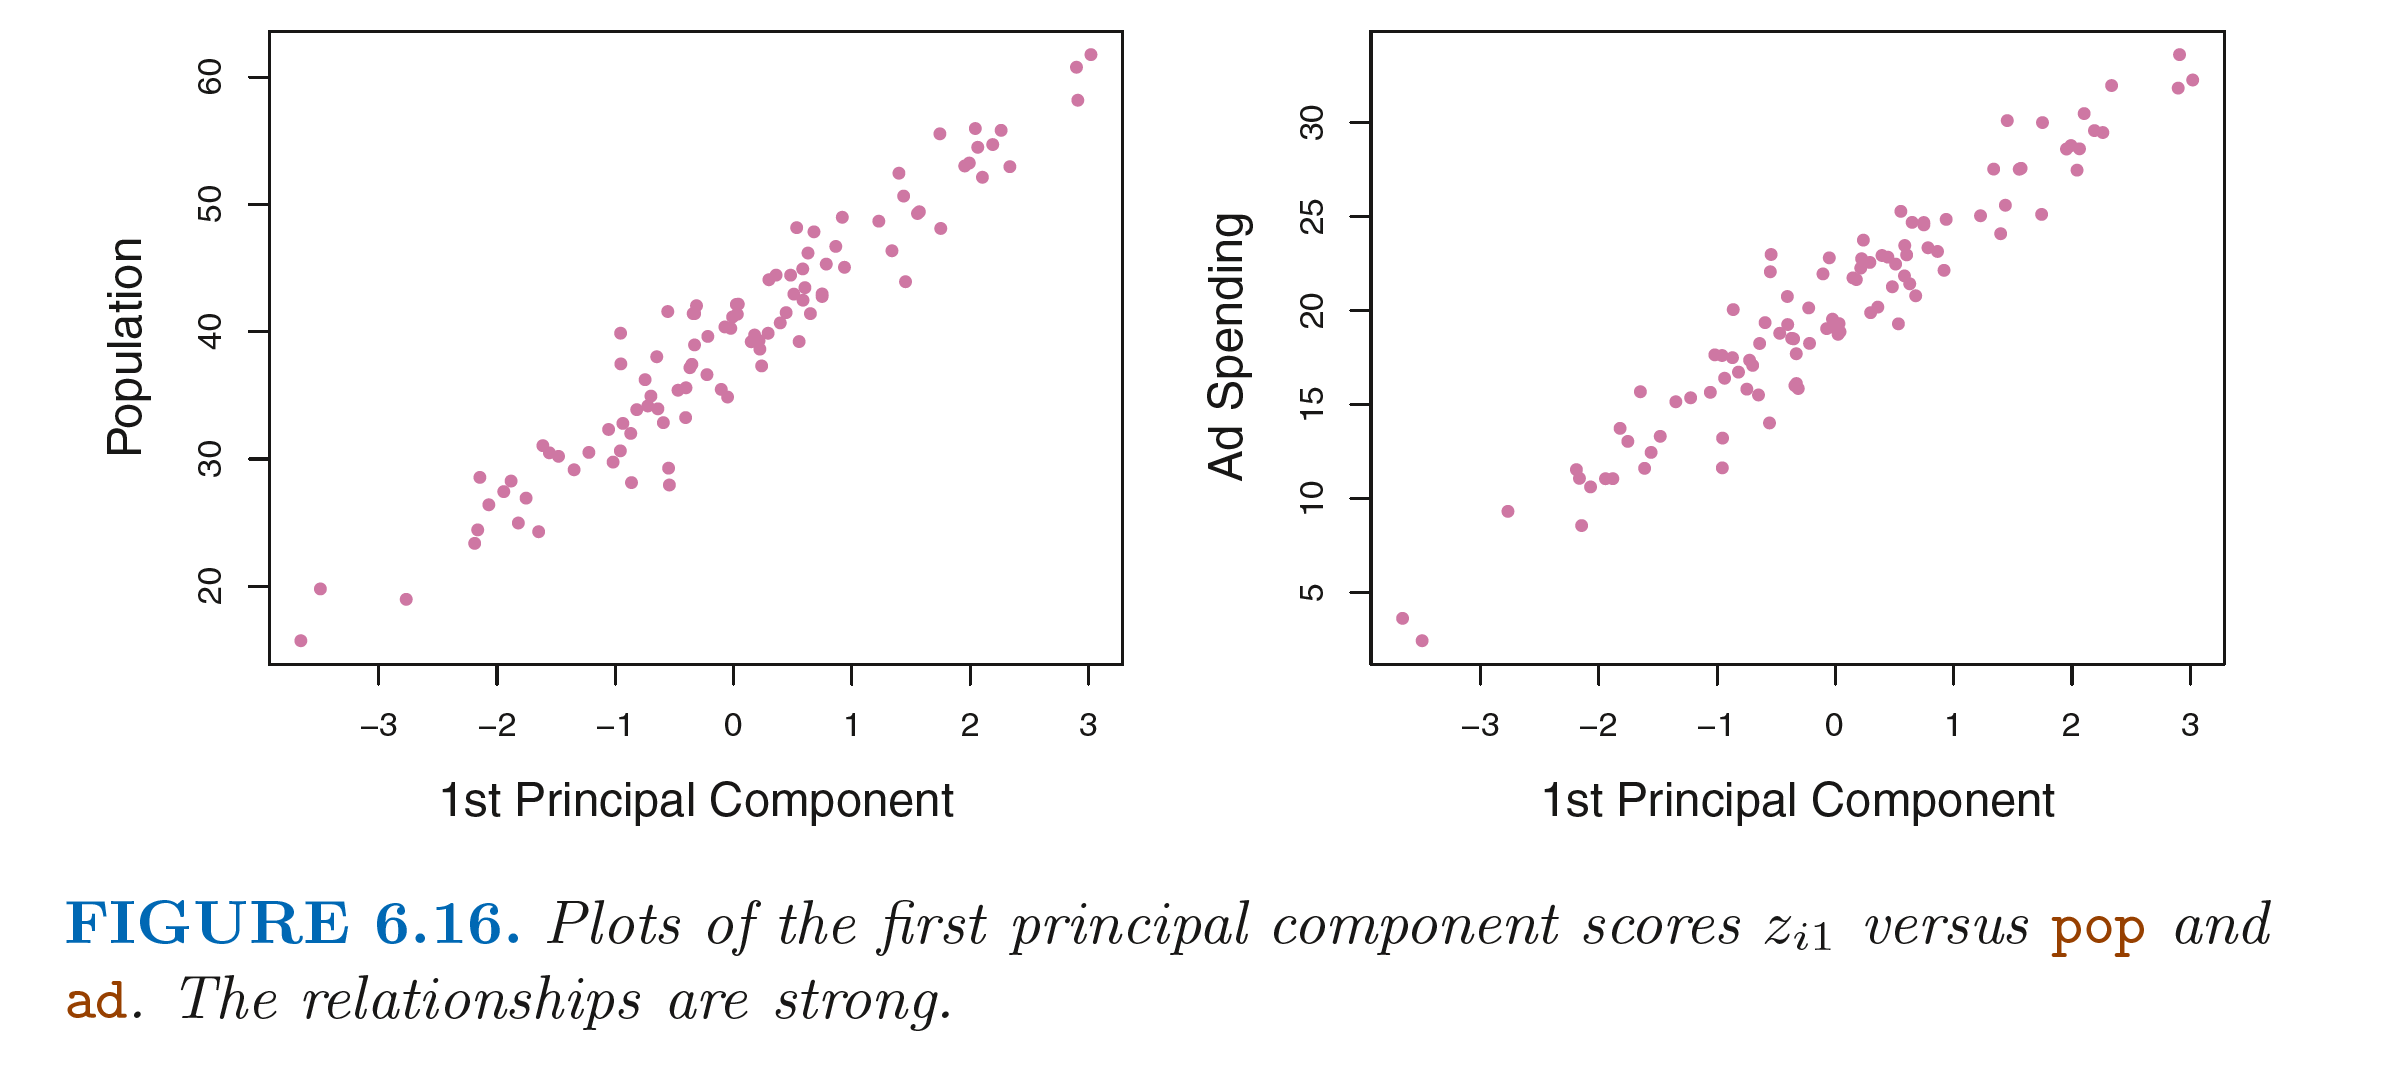

In [3]:
Image('D:/ukm.ppt/机器学习/week4/images/pw50.png', width =700)

+ The second principal component must be uncorrelated to the first which makes it orthogonal (90 degrees in two dimensions) to the first. 
+ The second principal component is
$$Z_2 = 0.544 \times (\tt{pop} - \overline{\tt{pop}}) - 0.839 \times (\tt{ad} - \overline{\tt{ad}}) $$
+ The second PC will capture less information (less spread). 
+ Plotting each PC against each variable can show how much information is captured by each one.


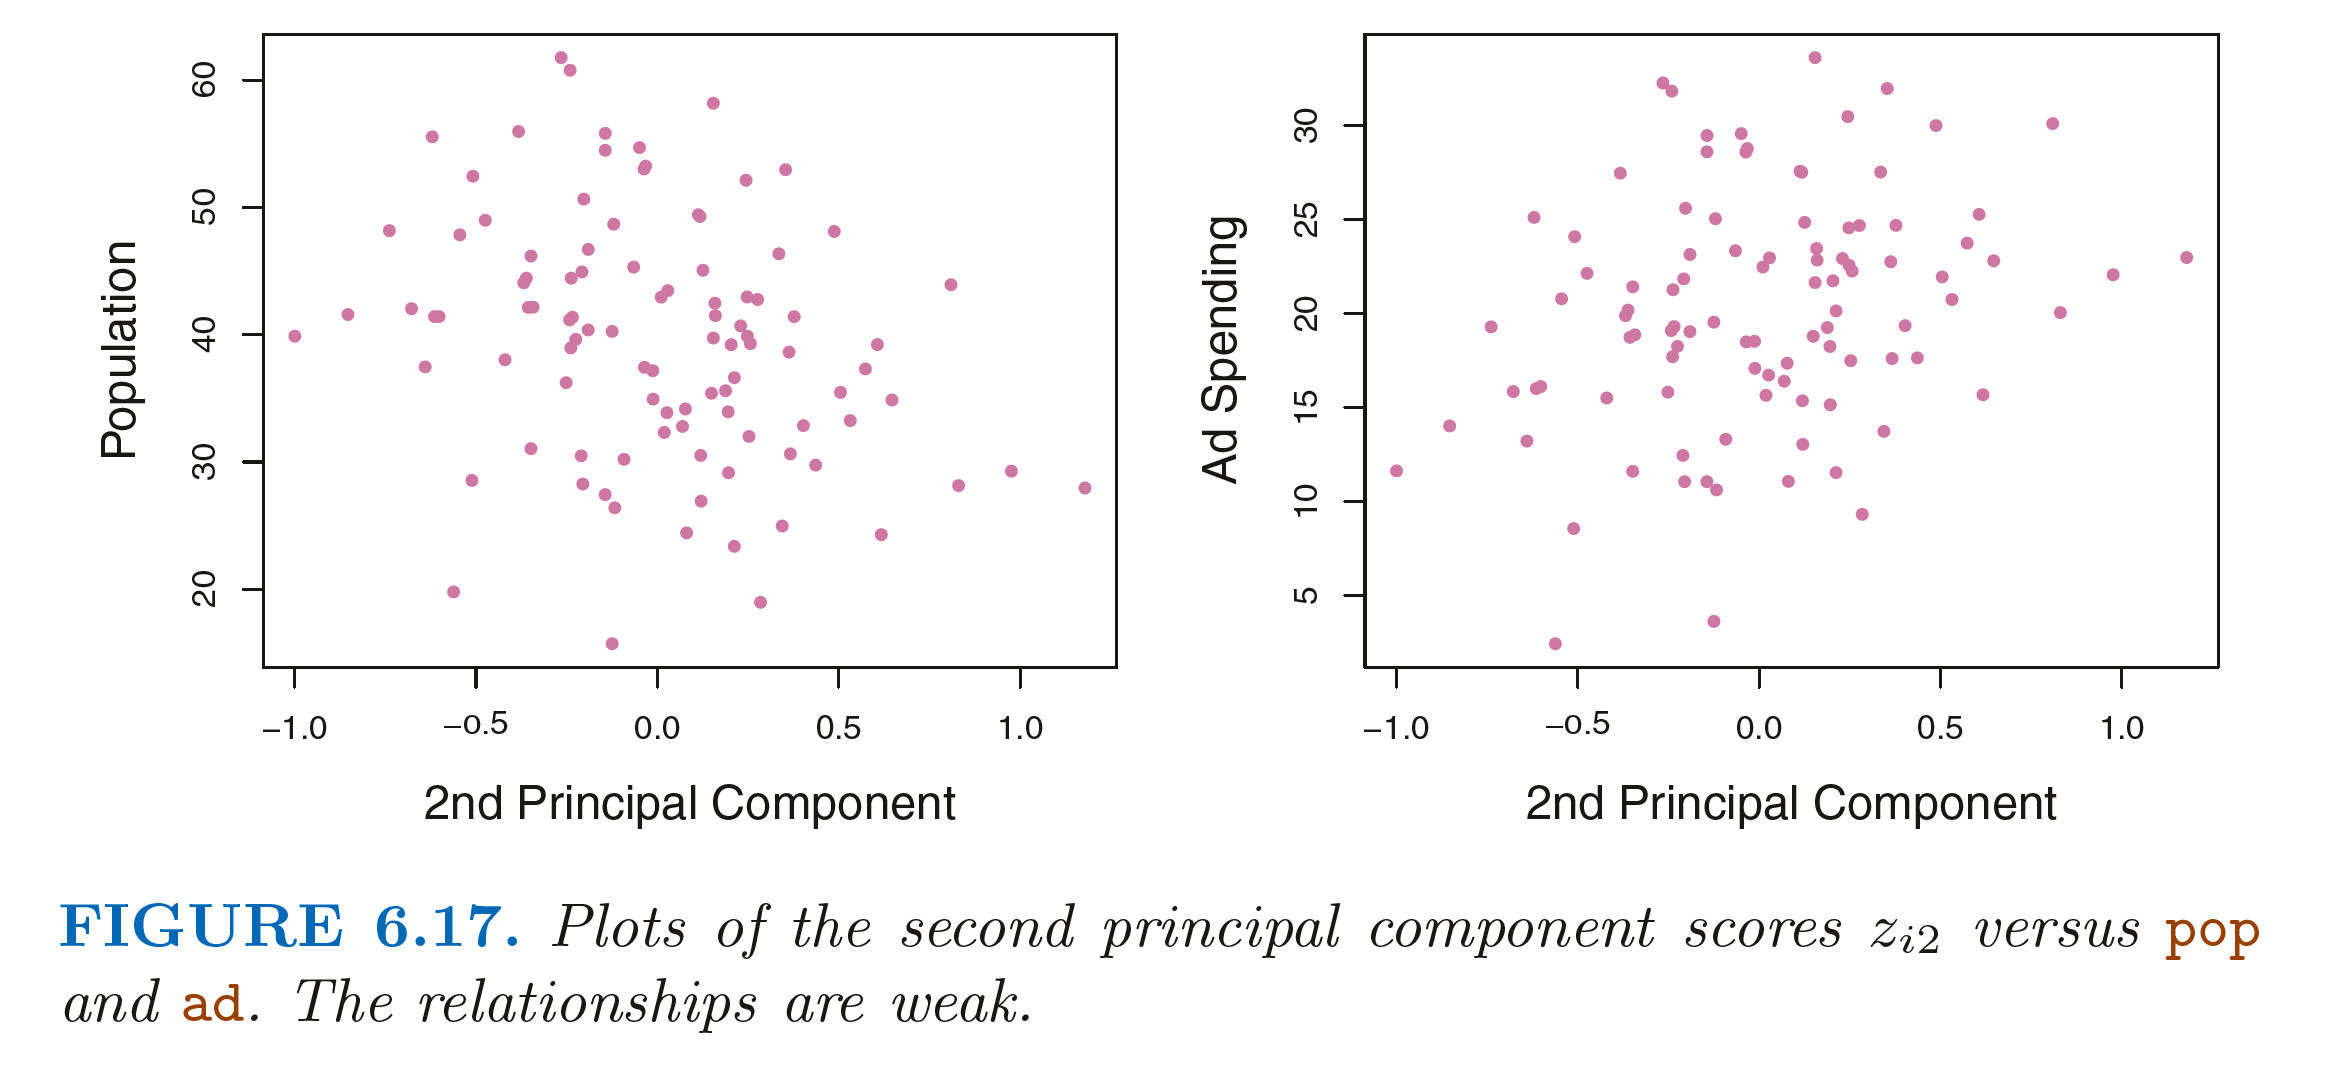

In [4]:
Image('D:/ukm.ppt/机器学习/week4/images/pw51.png', width =700)

**Conclusion for the Example:**
There is little relationship between the second principal component and these two predictors, suggesting, one only needs the first principal component in order to accurately represent the pop and ad budgets.

## Principal Component Regression
1. Find first M principal components where M < p then fit with least squares. 
2. Choose M with cross validation. 
+ Usually, data is standardized by standard deviation first.



In [2]:
# 先找出M < p的M个主成分，然后用最小二乘拟合。
# 选择交叉验证的M。
# 通常，先用标准差对数据进行标准化。
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error


df = pd.read_csv('D:/ukm.ppt/机器学习/week2/data/hitters.csv').dropna().drop('Unnamed: 0', axis=1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
# pd.get_dummies() 函数）创建的哑变量，将分类变量转换为数值的方法

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [8]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [4]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,False,True,False


Unfortunately `sklearn` does not have an implementation of PCA and regression combined,  so we'll have to do it ourselves.

We'll start by performing Principal Components Analysis (PCA), remember to scale the data:

In [5]:
pca = PCA() #不指定参数，pca会保留所有成分
X_reduced = pca.fit_transform(scale(X))   ###scale the data

#scale(X)标准化数据的，标准化是指将数据的均值调整为0，标准差调整为1
#fit_transform() 方法来拟合 PCA 模型并一步到位地将数据转换为降维后的形式。

In [6]:
pca.components_ #每一行代表一个主成分，每一列对应原始数据集中的一个特征。

array([[ 1.98290351e-01,  1.95861293e-01,  2.04368923e-01,
         1.98337092e-01,  2.35173803e-01,  2.08923752e-01,
         2.82575450e-01,  3.30462926e-01,  3.30741680e-01,
         3.18979493e-01,  3.38207859e-01,  3.40342839e-01,
         3.16802936e-01,  7.76971752e-02, -8.41641266e-04,
        -7.85936949e-03, -5.44708722e-02, -2.57252900e-02,
        -4.19103083e-02],
       [-3.83784030e-01, -3.77271117e-01, -2.37135612e-01,
        -3.77721344e-01, -3.14531203e-01, -2.29606097e-01,
         2.62401948e-01,  1.92903821e-01,  1.82898829e-01,
         1.26297318e-01,  1.72276112e-01,  1.68092078e-01,
         1.92314962e-01, -1.55736631e-01, -1.68651886e-01,
        -2.00759919e-01,  9.52132358e-02,  3.66795693e-02,
         7.75835646e-02],
       [ 8.86259262e-02,  7.40322605e-02, -2.16185630e-01,
        -1.71664221e-02, -7.30853444e-02,  4.56359160e-02,
         3.45809704e-02,  8.35744193e-02,  8.62510743e-02,
        -8.62723280e-02,  5.29956515e-02,  1.49927391e-02,
    

Print out the first few variables of the first few principal components:


In [7]:
pd.DataFrame(pca.components_.T).loc[:4,:5]
#T 是 NumPy 的转置操作，这意味着行和列交换
#.loc[]标签索引

,0,1,2,3,4,5
0,0.198290,-0.383784,0.088626,0.031967,0.028117,-0.070646
1,0.195861,-0.377271,0.074032,0.017982,-0.004652,-0.082240
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660,-0.149646
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536,-0.136660
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299,-0.111675


Now we'll perform 10-fold cross-validation to see how it influences the MSE:

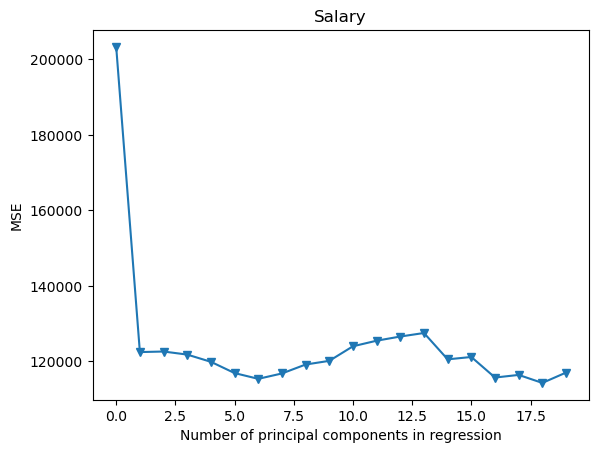

In [8]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
#shuffle=True 确保每次分折前数据会被打乱
#创建一个 KFold 对象用于 10 折交叉验证

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean() 
#cross_val_score 用于计算交叉验证的分数，计算仅包含截距（没有主成分）的模型的 MSE
# scoring='neg_mean_squared_error' 参数，交叉验证返回的是负的 MSE，因此需要通过乘以 -1 来获得正的 MSE 值。
# np.ones((n, 1))不考虑任何输入特征，只有一个截距项的模型性能。
# ravel() 是一个用于将多维数组降维到一维的函数
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    #[:,:i] 索引操作，选择前 i 个主成分作为特征输入
    #y.ravel() 用于将 y 数组变平，确保其维度适合函数处理。
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);#设置 x 轴的最小值，确保图形从 x = 0 开始显示

+ We see that the smallest cross-validation error occurs when $M = 18$ components are used. 
+ This is barely fewer than $M = 19$, which amounts to simply performing least squares, because when all of the components are used in PCR no dimension reduction occurs. 
+ However, from the plot we also see that the cross-validation error is roughly the same when only one component is included in the model. 
+ This suggests that a model that uses just a small number of components might suffice.

In [9]:
# 用于计算和展示主成分分析（PCA）结果中每个主成分累积解释的方差百分比。
## Amount of variance explained by adding each consecutive principal component:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#pca.explained_variance_ratio_:这是一个数组，其中包含每个主成分解释的方差的比例，这些值按照主成分的重要性（即方差解释量）排序。
#decimals=4,保留四位小数
#np.round四舍五入
#np.cumsum 是 NumPy 中的累计求和函数。它对输入数组的元素进行连续求和，结果数组中的每个位置的值都是原数组中所有前面元素的和。

array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

+ We can think of this as the amount of information about the predictors or the response that is captured using $M$ principal components. 
+ For example, setting $M = 1$ only captures 38.31% of all the variance, or information, in the predictors. 
+ In contrast, using $M = 6$ increases the value to 88.63%. If we were to use all $M = p = 19$ components, this would increase to 100%.


Now, perform PCA on the training data and evaluate its test set performance:


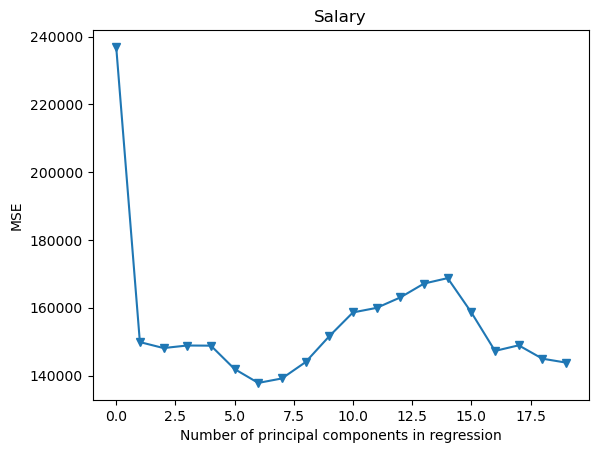

In [10]:

pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data 数据缩放
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)
#scale(X)标准化数据的，标准化是指将数据的均值调整为0，标准差调整为1
#fit_transform() 方法来拟合 PCA 模型并一步到位地将数据转换为降维后的形式。

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
#shuffle=True 确保每次分折前数据会被打乱
#创建一个 KFold 对象用于 10 折交叉验证

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

Lowest cross-validation error occurs when  M=6  components are used.

Performance on the test data:


In [11]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7] #选择前 7 个主成分

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred) #计算均方误差

111994.42273636983

## Partial Least Squares Regression 
+ For PCR, the response does not determine the principal components, which means that the PCA is used in an unsupervised way. 
+ PLSR is a supervised alternative to PCR. 
+ PLSR generates new features as a linear combination of the old features and the response
$$Z_m = \sum_{j=1}^p{\phi_{jm}X_j}$$
$$y_i = \theta_0 + \sum_{m=1}^M{\theta_m z_{im}} + \epsilon_i, \quad i=1, \ldots, n$$
+ Computed by doing simple linear regression of $Y$ onto each predictor and setting that coefficient to the linear combination coefficient for transformed variable $Z_1$. 
+ So weights are higher for those variables with stronger relationships to response. 
+ $Z_2$ is computed by regressing all variables against the residuals of $Z_1$ being fit to the model. 
+ Do this iteratively (fit remaining residuals) to come up with $M$ PLS components. 
+ Then do least squares fit on all $M$ new dimensions. 
+ In practice PLSR does not do better than PCR or ridge regression.


(-1.0, 19.9)

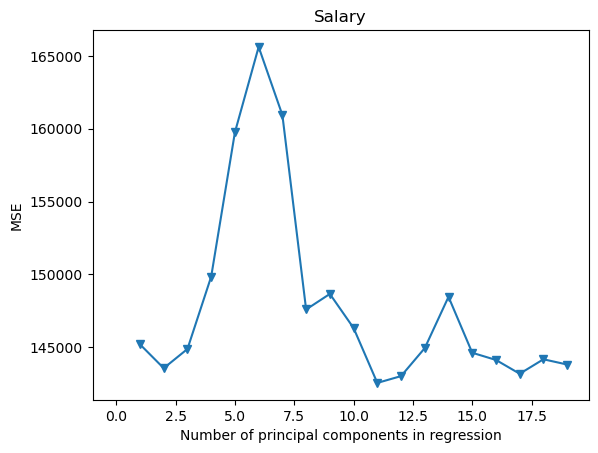

In [18]:
##Scikit-learn PLSRegression gives same results as the pls package in R when using method='oscorespls'. 
##However, the standard method used is 'kernelpls', which we'll use here.

n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i) #PLSRegression 创建一个部分最小二乘回归模型，其中主成分的数量设置为 i。
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [19]:
## The lowest cross-validation error occurs when only  M=2  partial least squares dimensions are used.

pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)
# scale() 函数用于确保所有的特征都被缩放到具有相同的尺度

mean_squared_error(y_test, pls.predict(scale(X_test)))

110954.85391841948

In [20]:
pls.x_weights_ # x的权重
# 权重显示了构建每个 PLS 成分时，每个 X 变量的重要性和贡献度。

array([[ 0.22169243, -0.08135141,  0.48918741],
       [ 0.24801659,  0.10680232,  0.25583619],
       [ 0.19086856, -0.16560761,  0.28258336],
       [ 0.23099539,  0.00157445,  0.3434409 ],
       [ 0.27939651,  0.02515833,  0.21273556],
       [ 0.2581145 ,  0.17099864,  0.05004189],
       [ 0.21748398, -0.24095063, -0.12332721],
       [ 0.28204078, -0.18887982, -0.07108118],
       [ 0.30122159, -0.1030702 , -0.1524328 ],
       [ 0.30152612, -0.04561776, -0.24789368],
       [ 0.30911543, -0.10843659, -0.15714054],
       [ 0.31619168, -0.0542783 , -0.22962508],
       [ 0.28230601, -0.11846668, -0.14163306],
       [ 0.25022095,  0.67017943, -0.1490378 ],
       [-0.0042623 ,  0.03531463,  0.26998357],
       [ 0.01524054,  0.09246776,  0.32051928],
       [-0.01436752,  0.22457552,  0.11149924],
       [-0.08909252, -0.48289367,  0.13562078],
       [-0.0116295 ,  0.21665369,  0.13633379]])

In [ ]:
pls.y_weights_

# High Dimensional Data
+ When speaking of high dimensional data, we generally mean data with many predictors, especially when p approaches or exceeds n. 
+ Generally it is better to have more predictors but if many of the predictors are not associated with the response then they can cause the actual signal to get diluted - a double edged sword these predictors.

# Exercises


## 6a
$(y_1 - \beta_1)^2 + \lambda\beta_1^2$

Problem allows me to choose $y_1$ and $\lambda$. I'll choose $y_1 = 5$ and $\lambda = 3$

In [2]:
# plot this as a function of beta
#(5 - beta)^2 + 3beta^2
# 岭回归，损失函数如何随参数 β 的变化而变化
import numpy as np
beta = np.linspace(-10, 10, 1000)
y = 5 #观测到的目标变量值
lam = 3 #正则化参数
ridge = (y - beta)**2 + lam * beta**2 #计算损失函数，岭回归

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

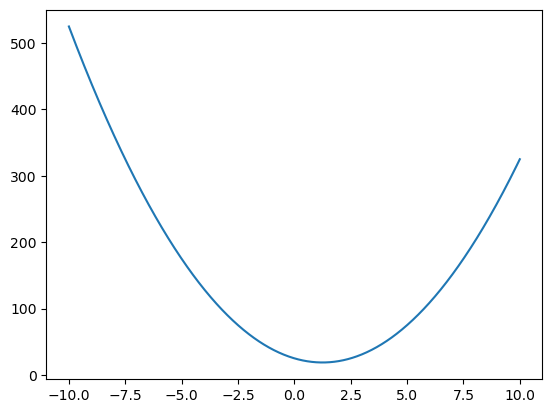

In [3]:
plt.plot(beta, ridge)

In [4]:
# min from plot
beta[np.argmin(ridge)]

1.2512512512512508

In [5]:
# min from 6.14
y / (1 + lam) # confirmed!

1.25

# 6b
do similar thing for lasso

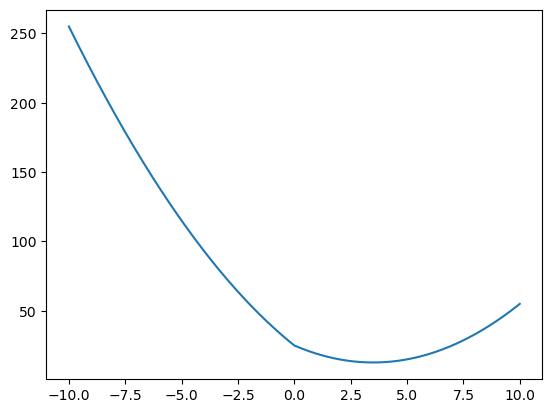

In [6]:
beta = np.linspace(-10, 10, 1000)
y = 5
lam = 3
lasso = (y - beta)**2 + lam * abs(beta) #lasso回归
plt.plot(beta, lasso)

In [7]:
beta[np.argmin(lasso)]

3.493493493493494

In [8]:
# min from 6.15
# since y > lambda / 2 minimum should be at y - lambda / 2
y - lam / 2 # confirmed!

3.5

# 8

In [4]:
x = np.random.randn(100) # 包含100个来自标准正态分布的随机数的数组。
err = np.random.randn(100)

In [5]:
beta0, beta1, beta2, beta3 = -5, 1, 4, 3 # 多项式回归模型的系数
y = beta0 + beta1 * x + beta2 * x ** 2 + beta3 * x ** 3 + err

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from itertools import combinations

In [7]:
from collections import OrderedDict

In [8]:
OrderedDict({'b': 1, 'a':534})
#  OrderedDict 的示例，它是 Python 中的一种字典，能够记住元素添加的顺序
# 顺序是先 'b' 后 'a'

OrderedDict([('b', 1), ('a', 534)])

In [9]:
df = pd.DataFrame({'x1': x, 'x2': x ** 2, 'x3': x**3, 'x4': x**4,'x5': x**5,
                   'x6': x**6,'x7': x**7,'x8': x**8,'x9': x**9,'x9_10': x**10,
                   'y':y})

In [10]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x9_10,y
0,0.666714,0.444507,0.296359,0.197586,0.131734,0.087829,0.058556,3.904038e-02,2.602875e-02,1.735372e-02,-1.911739
1,0.163315,0.026672,0.004356,0.000711,0.000116,0.000019,0.000003,5.060601e-07,8.264706e-08,1.349748e-08,-5.577347
2,0.299264,0.089559,0.026802,0.008021,0.002400,0.000718,0.000215,6.433397e-05,1.925287e-05,5.761697e-06,-5.140273
3,-0.575685,0.331413,-0.190789,0.109835,-0.063230,0.036401,-0.020955,1.206362e-02,-6.944842e-03,3.998040e-03,-3.684808
4,1.694471,2.871231,4.865216,8.243966,13.969159,23.670330,40.108680,6.796298e+01,1.151613e+02,1.951374e+02,20.393893


In [11]:
lr = LinearRegression()

In [12]:
X = df.iloc[:, :-1]
y = df['y']

In [13]:
lr.fit(X, y)

LinearRegression()

In [14]:
# 残差的方差,值越小，表明模型对数据的拟合越好。
sigma2 = np.sum((lr.predict(X) - y) ** 2) / len(X)

In [16]:
# best subset selection 最佳子集选择
n = len(X)
cp = []
bic = []
adj_r2 = []
for i in range(1, 11):
    current_cp = []
    current_bic = []
    current_adj_r2 = []
    for comb in combinations(range(10), i):
        X = df.iloc[:, list(comb)]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        tss = np.sum((y - y.mean()) ** 2)
        d = len(comb)
        current_cp.append(1/n * (rss + 2 * d * sigma2))
        current_bic.append(1/n * (rss + np.log(n) * d * sigma2))
        current_adj_r2.append(1 - rss / (n - d - 1) * (n - 1) / tss)
        
    cp.append(min(current_cp))
    bic.append(min(current_bic))
    adj_r2.append(max(current_adj_r2))

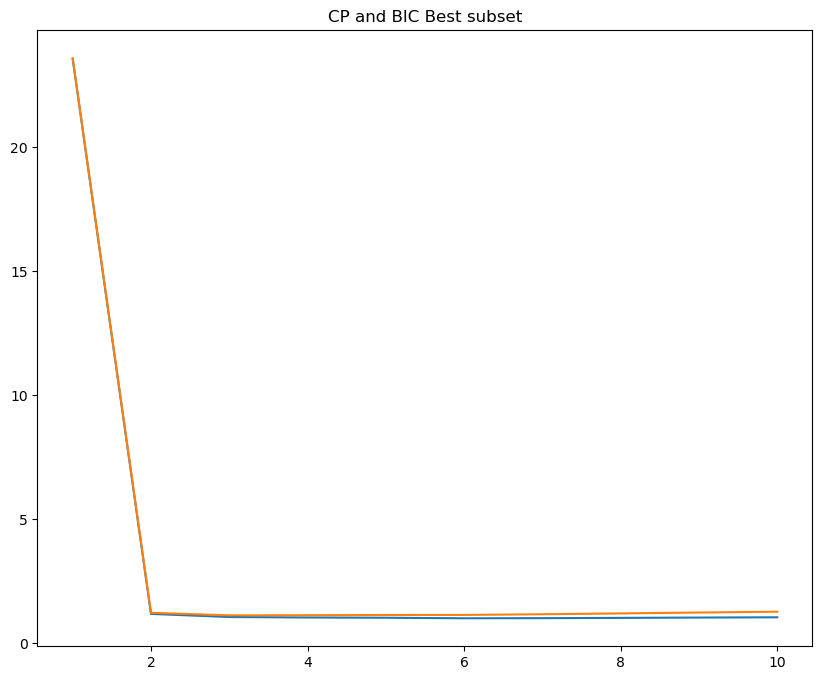

In [17]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), cp)
plt.plot(range(1, 11), bic)
plt.title("CP and BIC Best subset");

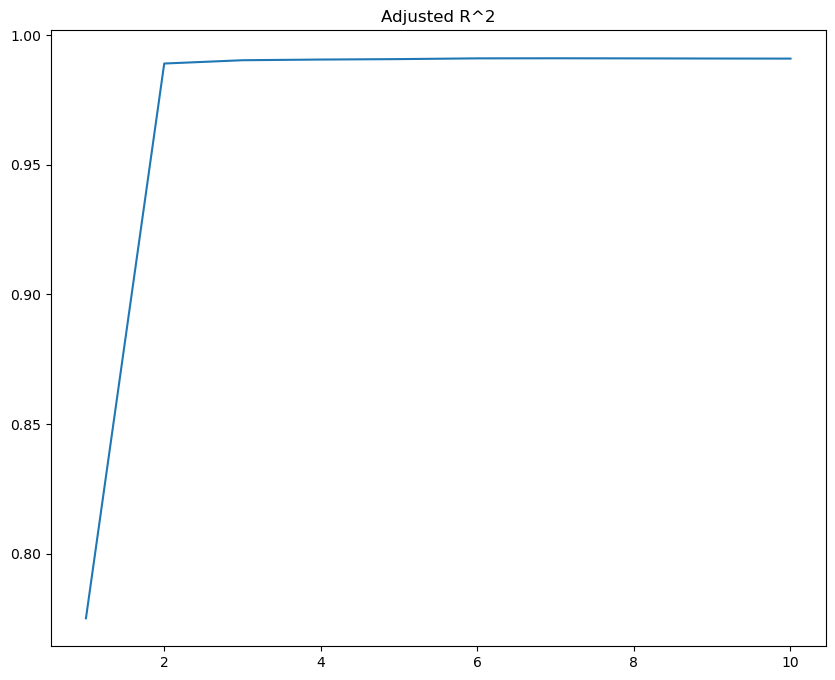

In [18]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), adj_r2)
plt.title("Adjusted R^2");

In [19]:
# all three agree on correct model!
np.argmin(cp), np.argmin(bic), np.argmax(adj_r2)

(5, 2, 6)

In [20]:
cp

[23.56689567544009,
 1.174869719294241,
 1.0499315279092192,
 1.0299891077166317,
 1.0202821295933358,
 0.9988943549061667,
 1.0034808231852252,
 1.014723489830917,
 1.0280089513421808,
 1.038583069136507]

In [21]:
# forward selection. Looks at Cp each step and stops if it can't beat old best 向前选择
current_vars = []
best_cp = 10000000
prev_cp = best_cp
best_cp = 1000000
while best_cp < prev_cp:
    prev_cp = best_cp
    old_vars = current_vars.copy()
    for i in range(10):
        if i in current_vars:
            continue
        X = df.iloc[:, old_vars + [i]]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        d = len(old_vars) + 1
        cur_cp = 1/n * (rss + 2 * d * sigma2)
        if cur_cp < best_cp:
            current_vars = old_vars + [i]
            best_cp = cur_cp

In [22]:
current_vars

[2, 1, 0]

In [23]:
best_cp

1.049931527909219

In [25]:
old_vars

[2, 1, 0]

In [26]:
# backward selection. Looks at Cp each step and stops if it can't beat old best 向后选择
current_vars = list(range(10))
best_cp = 10000000
prev_cp = best_cp
best_cp = 1000000
while best_cp < prev_cp:
    prev_cp = best_cp
    old_vars = current_vars.copy()
    for i in range(10):
        if i not in current_vars:
            continue
        old_vars2 = old_vars.copy()
        old_vars2.remove(i)
        X = df.iloc[:, old_vars2]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        d = len(old_vars) + 1
        cur_cp = 1/n * (rss + 2 * d * sigma2)
        if cur_cp < best_cp:
            current_vars = old_vars2.copy()
            best_cp = cur_cp

In [27]:
current_vars # same answer for backward selection

[1, 2, 4, 5, 6, 7]

In [28]:
X = df.iloc[:, :-1]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [30]:
X_stand = X / X.std() # 对 X 进行标准化处理，通过将每个特征除以其标准差来进行缩放。

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y)

In [32]:
# 探索不同正则化强度对LASSO回归模型的影响
alphas = np.linspace(.0001, .1, 1000) # 生成一个包含1000个值的数组，这些值均匀地分布在0.0001到0.1之间。
errors = []
for alpha in alphas:
    ls = Lasso(alpha, max_iter=100000, tol=.0001) # max_iter 是最大迭代次数，tol 是优化算法的收敛容忍度。
    ls.fit(X_train, y_train)
    errors.append(np.mean((ls.predict(X_test) - y_test) ** 2)) # 计算每个模型的均方误差 (MSE)

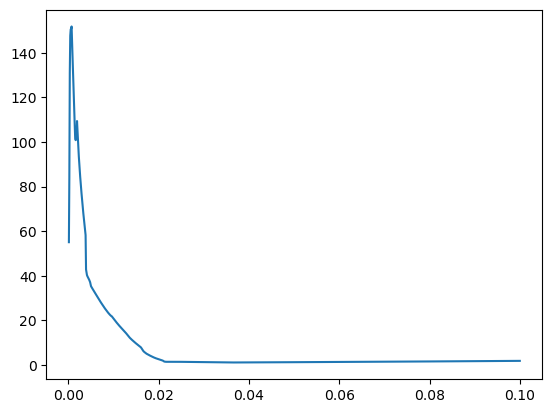

In [33]:
plt.plot(alphas, errors)

In [34]:
np.argmin(errors)

361

In [35]:
alphas[53]

0.0054

In [36]:
ls = Lasso(alpha=.0054, max_iter=100000, tol=.0001)
ls.fit(X_stand, y)

Lasso(alpha=0.0054, max_iter=100000)

In [37]:
ls.intercept_, ls.coef_

(-5.176670974856227,
 array([ 0.77098067,  5.24005303,  8.52165562, -1.08115427, -0.02589608,
        -0.        , -0.01172404,  0.        , -0.        ,  0.69653876]))

In [38]:
# beta 3 was very far off
beta0, beta1, beta2, beta3

(-5, 1, 4, 3)

### f

In [39]:
beta0_7 = 3
beta7 = -1

In [40]:
y_7 = beta0_7 + beta7 * x ** 7 + err

In [41]:
df_7 = pd.DataFrame({'x1': x, 'x2': x ** 2, 'x3': x**3, 'x4': x**4,'x5': x**5,
                   'x6': x**6,'x7': x**7,'x8': x**8,'x9': x**9,'x9_10': x**10,
                   'y':y_7})

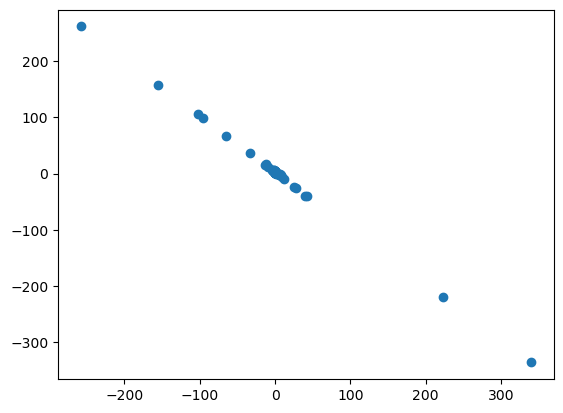

In [42]:
plt.scatter(X['x7'], y_7)

In [44]:
# best subset selection
X = df_7.iloc[:, :-1]
n = len(X)
tss = np.sum((y_7 - y_7.mean()) ** 2)
lr.fit(X,  y_7)
sigma2 = np.sum((lr.predict(X) - y_7) ** 2) / len(X)
cp = []
bic = []
adj_r2 = []
for i in range(1, 11):
    current_cp = []
    current_bic = []
    current_adj_r2 = []
    for comb in combinations(range(10), i):
        X = df_7.iloc[:, list(comb)]
        lr.fit(X, y_7)
        rss = np.sum((lr.predict(X) - y_7) ** 2)
        
        d = len(comb)
        current_cp.append(1/n * (rss + 2 * d * sigma2))
        current_bic.append(1/n * (rss + np.log(n) * d * sigma2))
        current_adj_r2.append(1 - rss / (n - d - 1) * (n - 1) / tss)
        
    cp.append(min(current_cp))
    bic.append(min(current_bic))
    adj_r2.append(max(current_adj_r2))

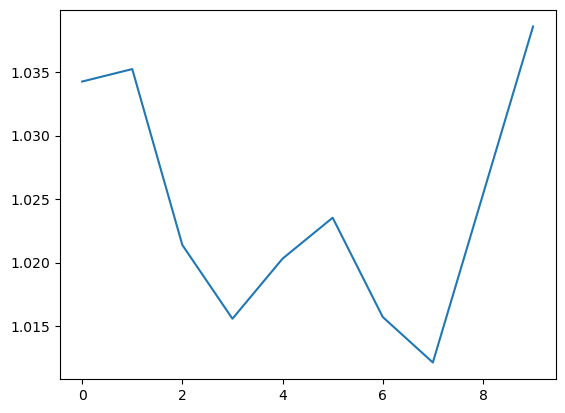

In [45]:
# best model is with one predictor
plt.plot(range(10), cp)
bic.append(min(current_bic))

In [46]:
# lasso
X = df_7.iloc[:, :-1]
X_stand = X / X.std()
X_train, X_test, y_train, y_test = train_test_split(X_stand, y_7)

In [47]:
alphas = np.linspace(.001, 50, 100)
errors = []
ls = Lasso(alpha, max_iter=1000000000, tol=.000001)

for alpha in alphas:
    ls = Lasso(alpha=alpha)
    ls.fit(X_train, y_train)
    errors.append(np.mean((ls.predict(X_test) - y_test) ** 2))

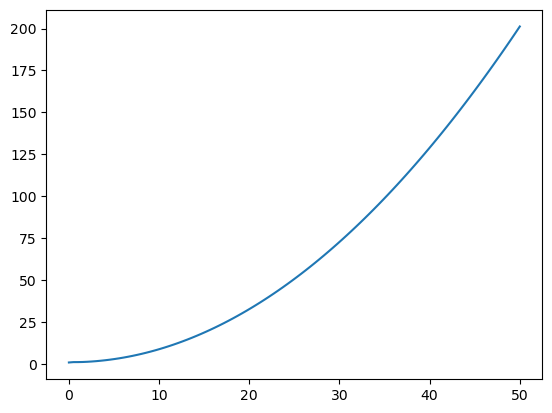

In [48]:
plt.plot(alphas, errors)

In [49]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

0.001

In [50]:
ls = Lasso(alpha=best_alpha, max_iter=100000, tol=.000001)
ls.fit(X_stand, y_7)

Lasso(alpha=0.001, max_iter=100000, tol=1e-06)

In [51]:
# coefficient doesn't resemble model at all. but these have been scaled by
# their  std.  must divide by std
ls.coef_

array([ -1.03914774,   0.61834986,   5.76370947,  -0.70827917,
       -14.77707541,  -1.18842419, -38.07333989,   0.        ,
        -5.88486359,   1.44311033])

In [52]:
# that's better - very close to actual value of -1
ls.coef_ / X.std() # 调整 Lasso 回归模型的系数，使它们适用于原始未标准化的数据尺度。

x1      -1.059528
x2       0.523118
x3       2.060603
x4      -0.139362
x5      -1.271593
x6      -0.050446
x7      -0.707628
x8       0.000000
x9      -0.022603
x9_10    0.002566
dtype: float64

In [53]:
# also look at intercept
ls.intercept_

2.76643862939716

# 9

In [54]:
!ls

'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [69]:
college = pd.read_csv('D:/ukm.ppt/机器学习/week2/data/college.csv')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [57]:
college['Private'].value_counts()

Private
Yes    565
No     212
Name: count, dtype: int64

In [58]:
college['private_yes'] = (college['Private'] == 'Yes') * 1

In [59]:
X = college.iloc[:, 3:]

In [60]:
y = college['Apps']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
# Error 计算均方误差
np.mean((lr.predict(X_test) - y_test) ** 2)

7683256.1131976815

In [64]:
from sklearn.linear_model import RidgeCV

In [65]:
X_std = X.iloc[:, :-1].std() # 计算每个特征的标准差。

In [66]:
X_std['private_yes'] = 1

In [67]:
X_std

Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
private_yes       1.000000
dtype: float64

In [68]:
# 岭回归交叉验证
rcv = RidgeCV(alphas=np.linspace(.01, 100, 1000), cv=10)
rcv.fit(X / X_std, y) #X 的每个特征除以其标准差 X_std 来进行标准化

RidgeCV(alphas=array([1.00000000e-02, 1.10090090e-01, 2.10180180e-01, 3.10270270e-01,
       4.10360360e-01, 5.10450450e-01, 6.10540541e-01, 7.10630631e-01,
       8.10720721e-01, 9.10810811e-01, 1.01090090e+00, 1.11099099e+00,
       1.21108108e+00, 1.31117117e+00, 1.41126126e+00, 1.51135135e+00,
       1.61144144e+00, 1.71153153e+00, 1.81162162e+00, 1.91171171e+00,
       2.01180180e+00, 2.11189189e+0...
       9.76979279e+01, 9.77980180e+01, 9.78981081e+01, 9.79981982e+01,
       9.80982883e+01, 9.81983784e+01, 9.82984685e+01, 9.83985586e+01,
       9.84986486e+01, 9.85987387e+01, 9.86988288e+01, 9.87989189e+01,
       9.88990090e+01, 9.89990991e+01, 9.90991892e+01, 9.91992793e+01,
       9.92993694e+01, 9.93994595e+01, 9.94995495e+01, 9.95996396e+01,
       9.96997297e+01, 9.97998198e+01, 9.98999099e+01, 1.00000000e+02]),
        cv=10)